In [45]:
# !pip install numpy pandas matplotlib
%matplotlib inline

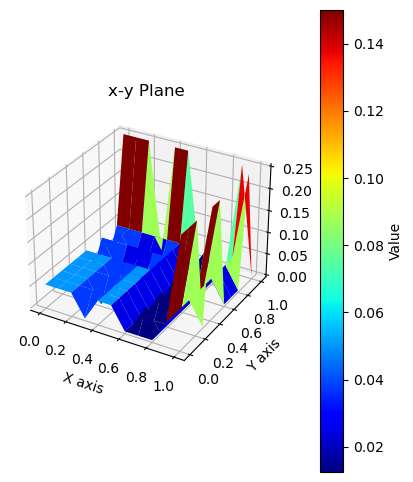

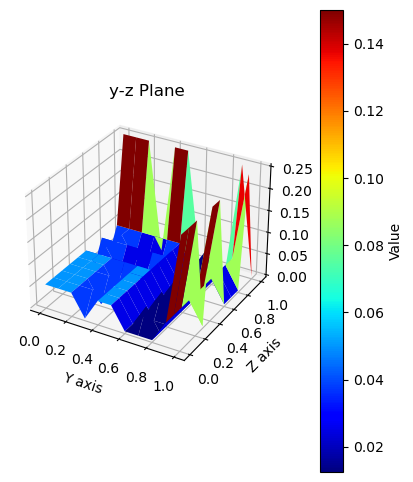

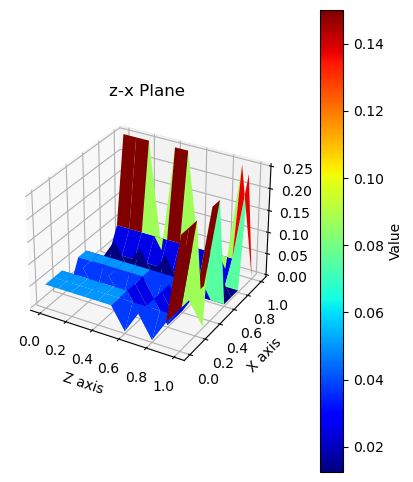

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_surface(x, y, z, values, xlabel, ylabel, zlabel, title, position):
    # Create meshgrid for surface plot
    x_unique = np.unique(x)
    y_unique = np.unique(y)
    X, Y = np.meshgrid(x_unique, y_unique)
    
    # Initialize Z array
    Z = np.zeros_like(X)

    # Interpolate data onto the meshgrid
    for i in range(len(x)):
        xi = np.where(x_unique == x[i])[0][0]
        yi = np.where(y_unique == y[i])[0][0]
        Z[yi, xi] = values[i]

    # Create figure
    fig = plt.figure(figsize=(16, 100))

    # Correct way to use *position for subplot
    ax = fig.add_subplot(*position, projection='3d')  # Unpack position tuple here
    
    # Plot the surface
    surf = ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none')
    
    # Labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Color bar
    cbar = fig.colorbar(surf, ax=ax, pad=0.1, shrink=0.06, aspect=20)
    cbar.set_label(zlabel) 

    # Show the plot
    plt.show()

def main():
    # Example data
    file_path = "kernel.csv"
    data = pd.read_csv(file_path)

    x = data['x']
    y = data['y']
    z = data['z']
    w = data['w']
    dwdq1 = data['dwdq1']
    dwdq2 = data['dwdq2']
    dwdq3 = data['dwdq3']

    values = w  # Choose what to visualize, e.g., w, dwdq1, dwdq2, dwdq3
    
    # ---- x-y Plane Visualization ----
    plot_surface(x, y, z, values, 'X axis', 'Y axis', 'Value', 'x-y Plane', (1, 3, 1))
    
    # ---- y-z Plane Visualization ----
    plot_surface(y, z, x, values, 'Y axis', 'Z axis', 'Value', 'y-z Plane', (1, 3, 2))
    
    # ---- z-x Plane Visualization ----
    plot_surface(z, x, y, values, 'Z axis', 'X axis', 'Value', 'z-x Plane', (1, 3, 3))

if __name__ == "__main__":
    main()
